In [37]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [11]:
path="/content/drive/MyDrive/Churn_Modelling.csv"

In [12]:
df=pd.read_csv(path)

In [13]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
799,800,15567367,Tao,601,Germany,Female,42,9,133636.16,1,0,1,103315.74,0
1173,1174,15808182,Beneventi,478,Spain,Female,36,3,92363.30,2,1,0,44912.70,0
8654,8655,15573730,Thompson,586,Germany,Male,42,6,126704.49,2,1,0,41682.30,0
5958,5959,15741719,DeRose,540,France,Female,40,3,165298.12,1,0,1,199862.75,0
5050,5051,15663294,Kao,703,France,Male,32,1,125685.79,1,1,1,56246.72,0


In [14]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [15]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
df.shape

(10000, 11)

In [17]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
df1 = df[df.EstimatedSalary!=' ']
df1['Gender'].replace({'Female':1,'Male':0},inplace=True)

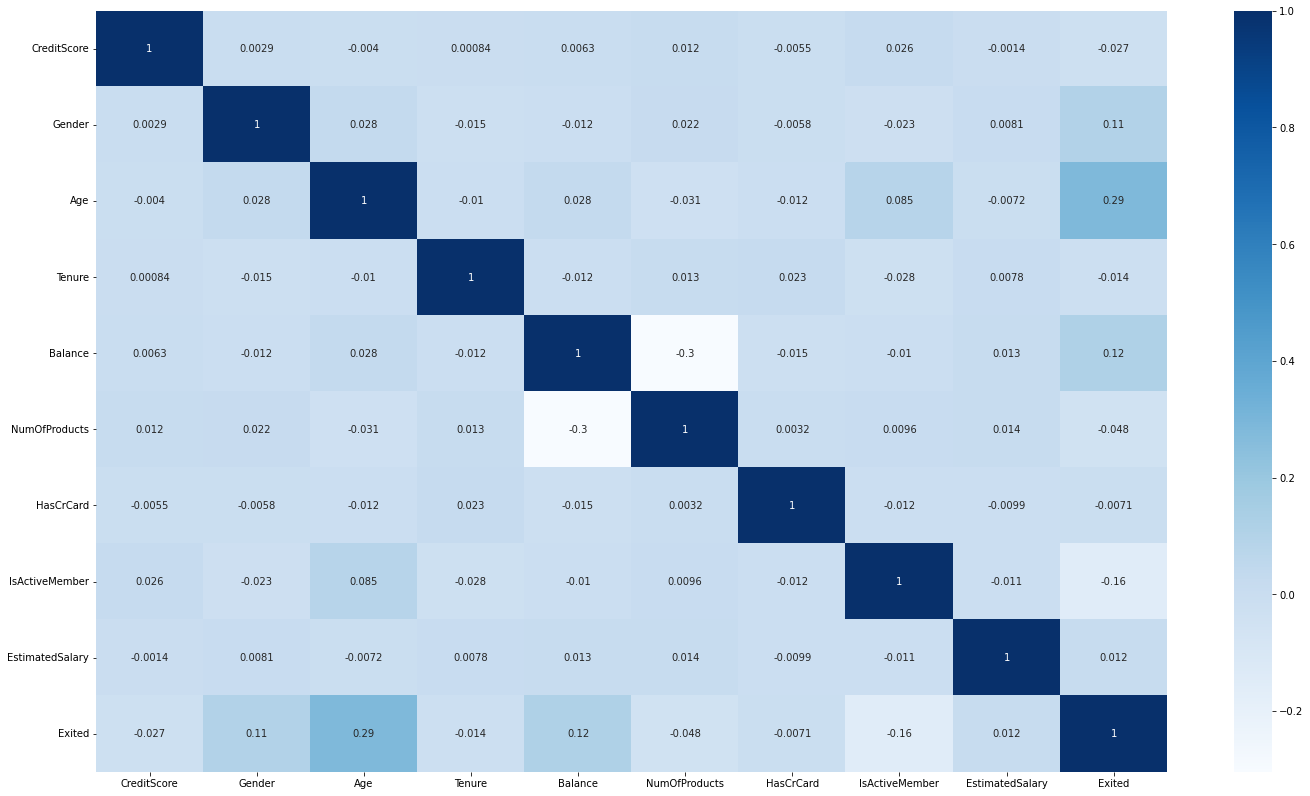

In [27]:
corr_mat=df.corr()
plt.figure(figsize=(24,14))
sns.heatmap(corr_mat,annot=True,cmap='Blues')

In [30]:
X= df1.drop(columns=['Exited' ], axis=1)

In [31]:
y= df1['Exited']

In [32]:
geography= pd.get_dummies(X['Geography'])
X= pd.concat([X,geography], axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,France,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [33]:
X=X.drop('Geography',axis=1)

In [36]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state= 0)

In [42]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(Xtrain, ytrain, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 905us/step - loss: 3.1010 - accuracy: 0.7750
Epoch 2/50
250/250 [==============================] - 0s 891us/step - loss: 0.5916 - accuracy: 0.7940
Epoch 3/50
250/250 [==============================] - 0s 890us/step - loss: 0.5301 - accuracy: 0.7955
Epoch 4/50
250/250 [==============================] - 0s 878us/step - loss: 0.5132 - accuracy: 0.7956
Epoch 5/50
250/250 [==============================] - 0s 900us/step - loss: 0.5066 - accuracy: 0.7956
Epoch 6/50
250/250 [==============================] - 0s 871us/step - loss: 0.5060 - accuracy: 0.7958
Epoch 7/50
250/250 [==============================] - 0s 878us/step - loss: 0.5056 - accuracy: 0.7960
Epoch 8/50
250/250 [==============================] - 0s 943us/step - loss: 0.5057 - accuracy: 0.7960
Epoch 9/50
250/250 [==============================] - 0s 892us/step - loss: 0.5057 - accuracy: 0.7960
Epoch 10/50
250/250 [==============================] - 0s 886us/step - loss: 0.505

In [45]:
pred=model.predict(Xtest)
pred

array([[0.20470333],
       [0.20470333],
       [0.20470333],
       ...,
       [0.20470333],
       [0.20470333],
       [0.20470333]], dtype=float32)

In [46]:
y_pred=[]
for i in pred:
  if i >0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [48]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report:")
print(classification_report(ytest,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(69.0, 0.5, 'True'),
 Text(0.5, 69.0, 'Predicted'),
 Text(0.5, 1.0, 'Confusion Matrix')]

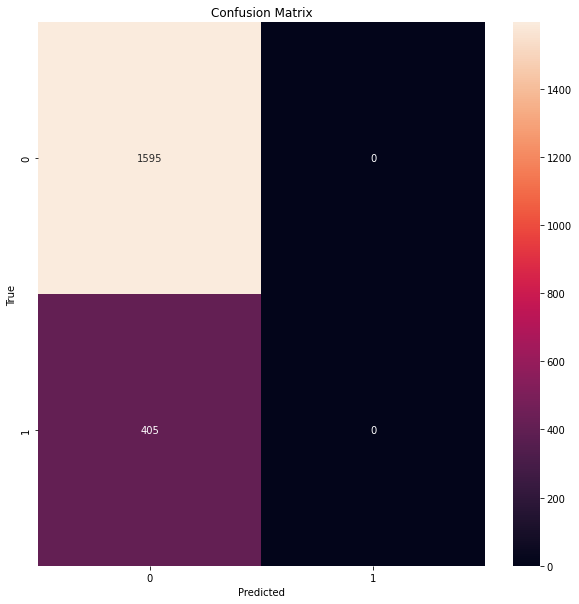

In [49]:
plt.figure(figsize=(10,10))
conf_mat=confusion_matrix(ytest,y_pred)
sns.heatmap(conf_mat,annot=True,fmt='d').set(title='Confusion Matrix',xlabel='Predicted',ylabel='True')